# Hotel Bookings - Sanity Check

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
## 1 - Importações e Setup
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [10]:
import io
import os,sys
import numpy as np 
import pandas as pd
import datetime as dt
import calendar
import glob
import matplotlib.pyplot as plt
import seaborn as sns
#import qgrid
pd.set_option('display.max_columns',None)

from tqdm import tqdm

import plotly.graph_objs as go
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "vscode"
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)


In [11]:
def add_coluna_faltante(col_,valor_,df_,tipo_ = np.nan):
    #col_ -> nome da coluna original
    #valor_ -> valor que substitui os valores faltantes
    #df_ -> dataframe a ser alterado
    #tipo_ -> modifica o tipo de dado da coluna
    
    lista = df_[col_].copy()
    lista.where(lista.isnull(), other=0, inplace=True)
    lista.where(~lista.isnull(), other=1, inplace=True)

    new = "missing_"+col_
    #cria uma feature "missing_name"

    df_.insert(df.shape[1],new,lista)
    df_[col_] = df_[col_].where(pd.notnull(df_[col_]), valor_)
    df_[new]=df_[new].astype('int8')
    
    return df_
    #retorna dataframe processado

In [12]:
df = pd.read_csv("hotel_bookings.csv")
#qgrid_widget = qgrid.show_grid(df, show_toolbar=True)
#qgrid_widget

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
## 2 - Descrição da base de dados
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [14]:
numericas = [feature for feature in df.columns if df[feature].dtype in ['float64',"int64"]]
categoricas = [feature for feature in df.columns if df[feature].dtype=='O']
print(len(numericas) + len(categoricas))

32


In [15]:
df.head(3)

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     0       2       0.0       0   
1                        0                     0       2       0.0       0   
2                        0                     1       1       0.0       0   

  meal country market_segment distribution_channel  is_repeated_guest  \
0   BB     PRT         Direct               Direct                  0   
1   BB     PRT         Direct               Direct                  0   
2   BB     GBR         Direct               Direct                  0   

   previous_cancellations  previous_bookings_not_canceled reserved_room_type  \
0                       0                               0                  C   
1                       0                               0                  C   
2                       0                               0                  A   

  assigned_room_type  booking_changes deposit_type  agent  company  \
0                  C                3   No Deposit    NaN      NaN   
1                  C                4   No Deposit    NaN      NaN   
2                  C                0   No Deposit    NaN      NaN   

   days_in_waiting_list customer_type   adr  required_car_parking_spaces  \
0                     0     Transient   0.0                            0   
1                     0     Transient   0.0                            0   
2                     0     Transient  75.0                            0   

   total_of_special_requests reservation_status reservation_status_date  
0                          0          Check-Out              2015-07-01  
1                          0          Check-Out              2015-07-01  
2                          0          Check-Out              2015-07-02

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
## 3 - Missing Values
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [16]:
missing_colunas = [features for features in df.columns if df[features].isnull().sum()>1]
for feature in missing_colunas:
    print(feature, np.round(df[feature].isnull().mean()*100, 4),  ' % de missing values')

children 0.0034  % de missing values
country 0.4087  % de missing values
agent 13.6862  % de missing values
company 94.3069  % de missing values


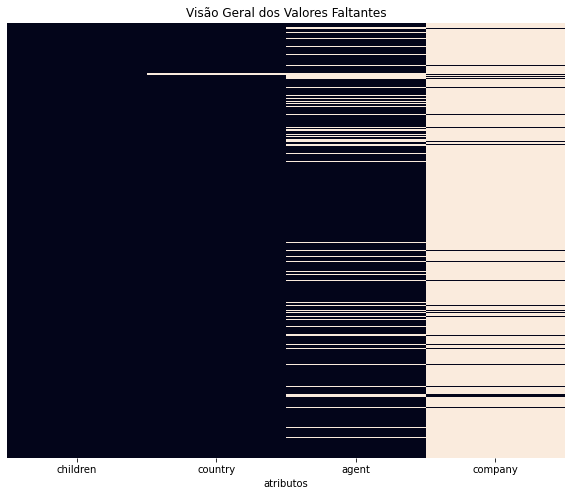

In [17]:
plt.figure(figsize=(10,8))
sns.heatmap(df[missing_colunas].isnull(),
           yticklabels=0,
           cbar=False)
plt.title('Visão Geral dos Valores Faltantes')
plt.xlabel('atributos')
plt.show()

In [18]:
for feature in ["agent", "company"]:
    df = add_coluna_faltante(col_ = feature, valor_ = np.nan, df_ = df, tipo_ = 'int8')

In [19]:
#print(calendar.month_name[1])
#list(calendar.month_name)

def acha_mes(mes_):
    return list(calendar.month_name).index(mes_) 

Text(0, 0.5, 'qtd de bookings')

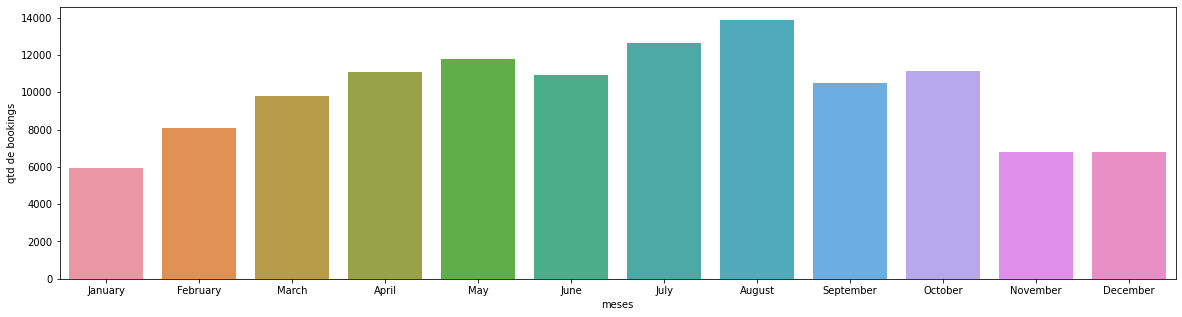

In [20]:
#df['arrival_date_month'].value_counts()

plt.figure(figsize=(20,5))
graph=sns.countplot(x='arrival_date_month',
                data=df, order = list(calendar.month_name)[1:])
graph.set_xlabel('meses')
graph.set_ylabel('qtd de bookings')

['meal', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status']


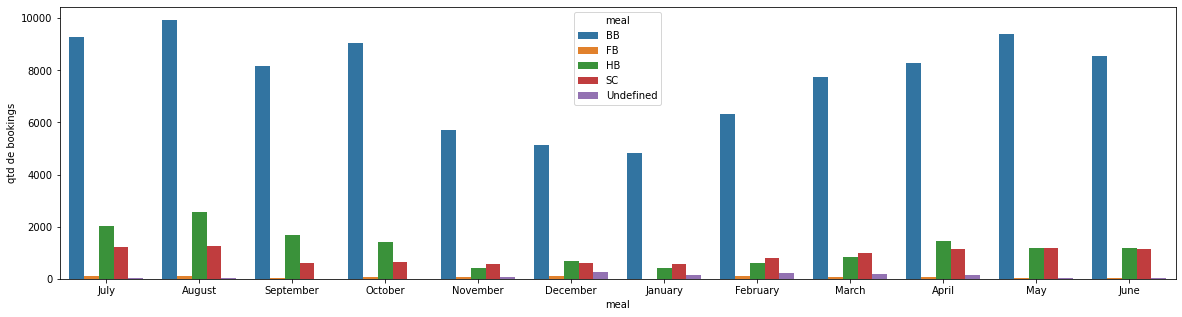

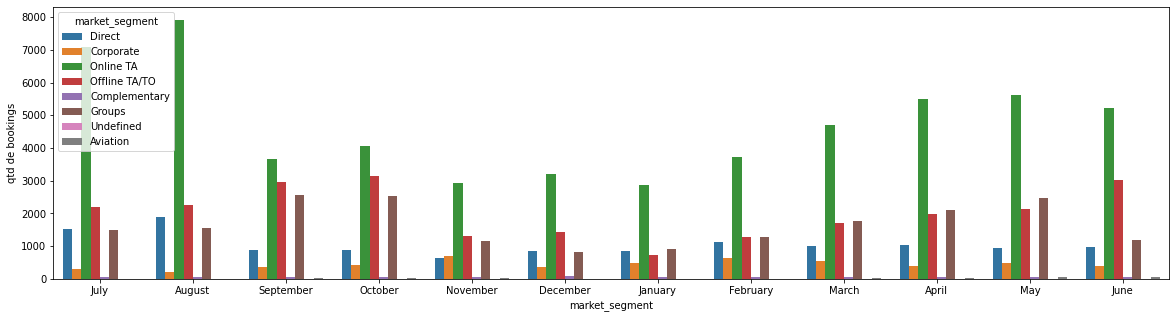

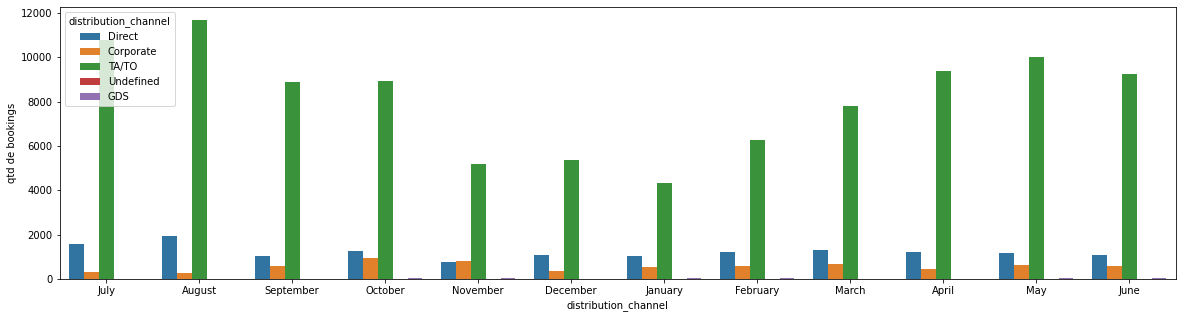

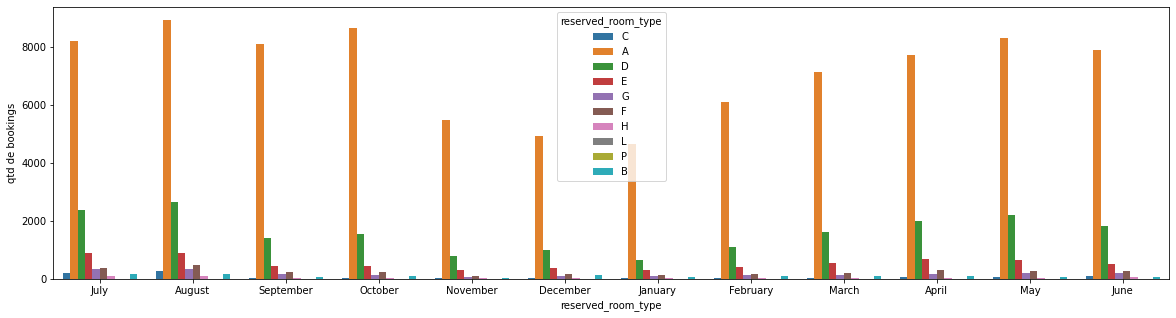

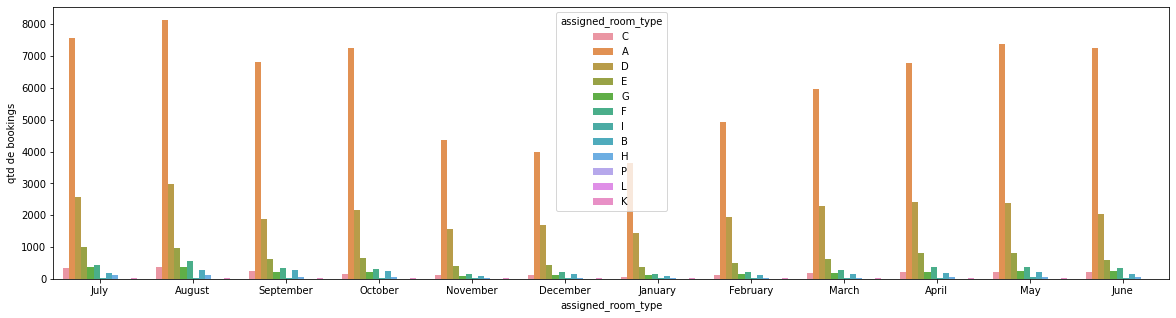

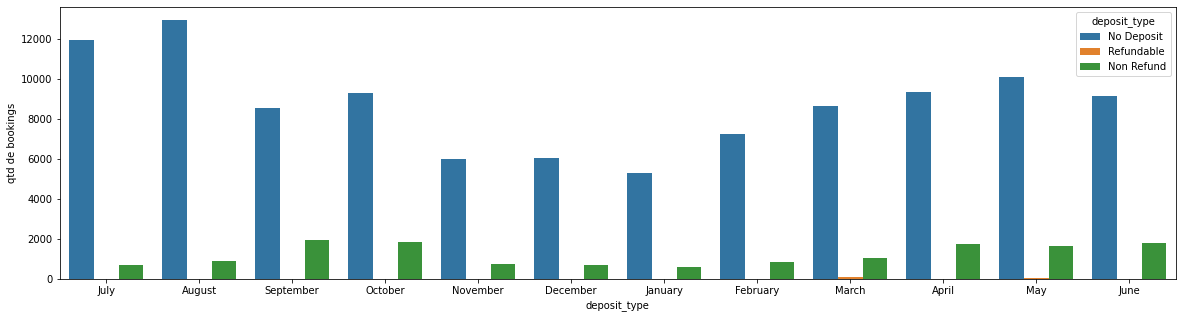

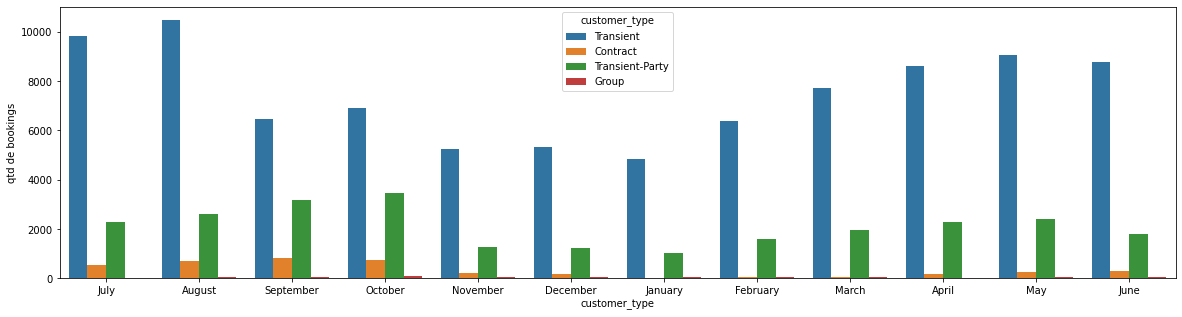

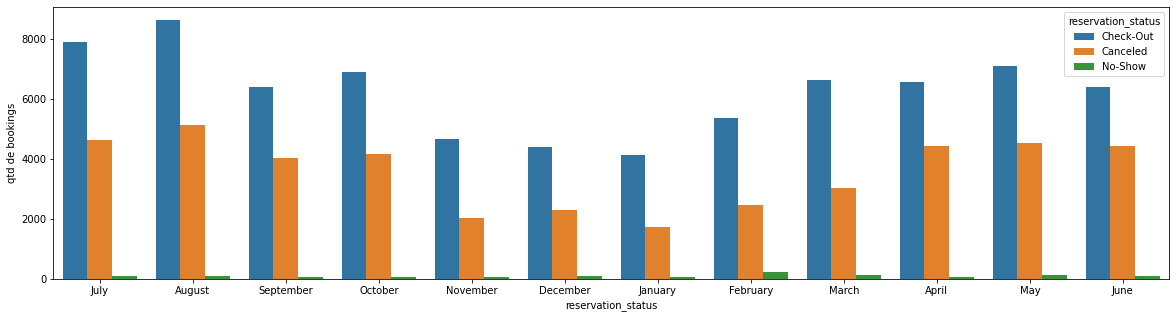

In [21]:
categoricas.remove("hotel")
categoricas_especiais = ["arrival_date_month","country","reservation_status_date"]
for i in categoricas_especiais: categoricas.remove(i)

print(categoricas)

for feature in categoricas:
    plt.figure(figsize = (20,5))
    graph = sns.countplot(x = "arrival_date_month", data = df, hue=feature)
    graph.set_xlabel(feature)
    graph.set_ylabel('qtd de bookings')

In [22]:
# Transforma os meses e gera uma data unificada

df['arrival_date_month'] = df['arrival_date_month'].apply(acha_mes)
df["arrival_date"] = df.apply(lambda x: dt.date(x.arrival_date_year, x.arrival_date_month, x.arrival_date_day_of_month), axis=1)

#testando tipo
df["arrival_date"][0]

datetime.date(2015, 7, 1)

Text(0, 0.5, 'qtd de bookings')

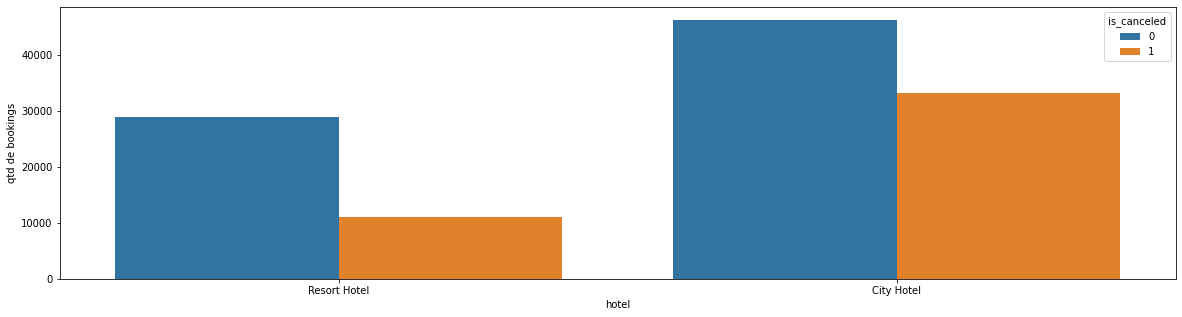

In [23]:
plt.figure(figsize = (20,5))
graph = sns.countplot(x = "hotel", data = df, hue="is_canceled")
graph.set_xlabel("hotel")
graph.set_ylabel('qtd de bookings')

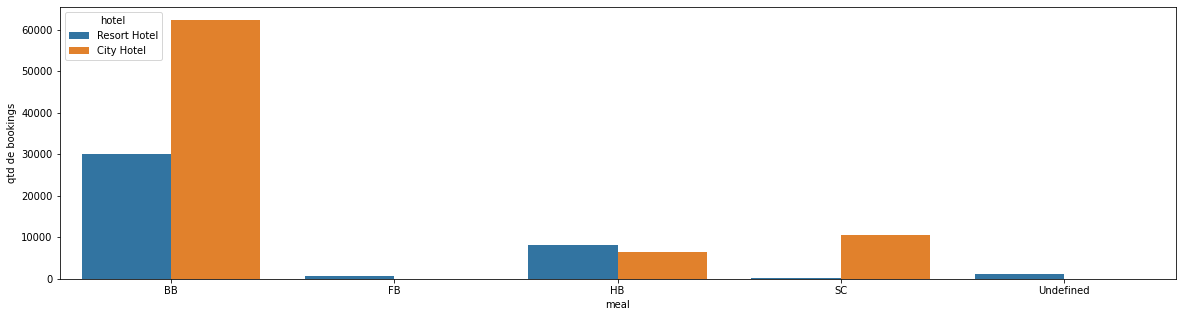

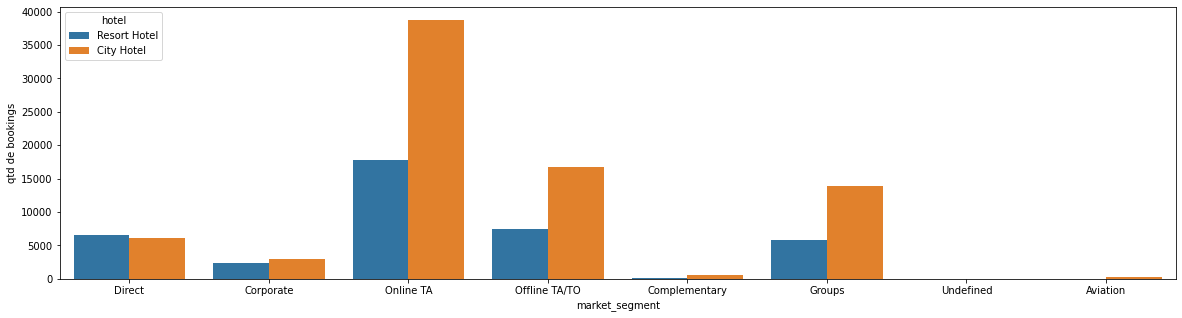

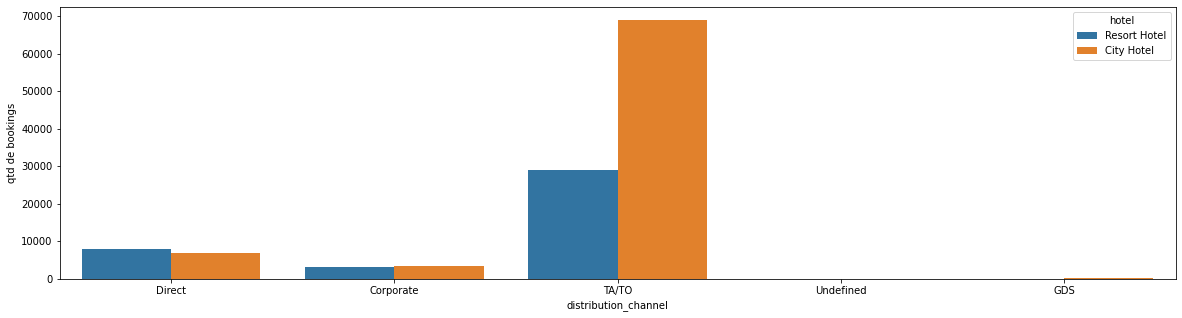

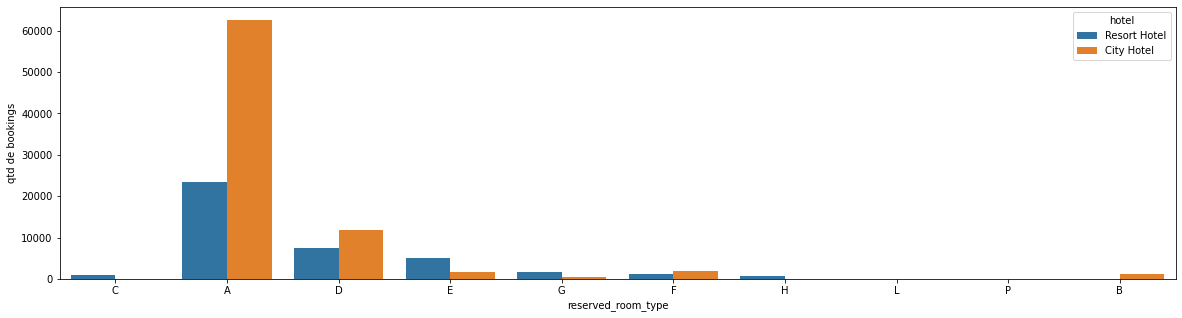

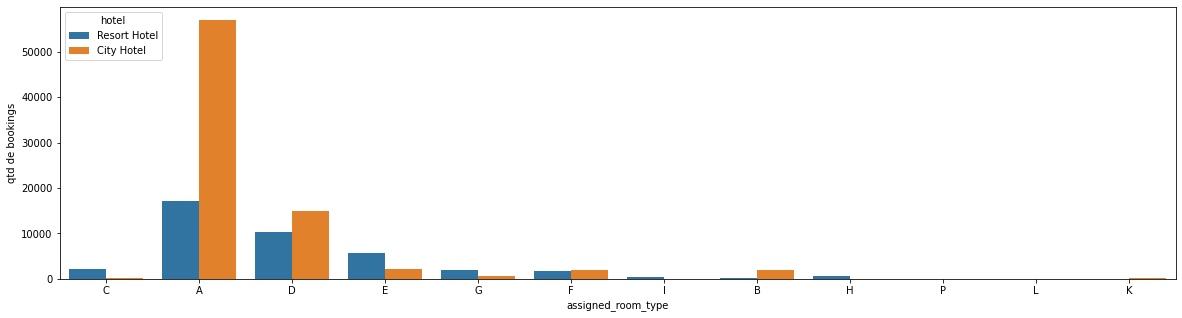

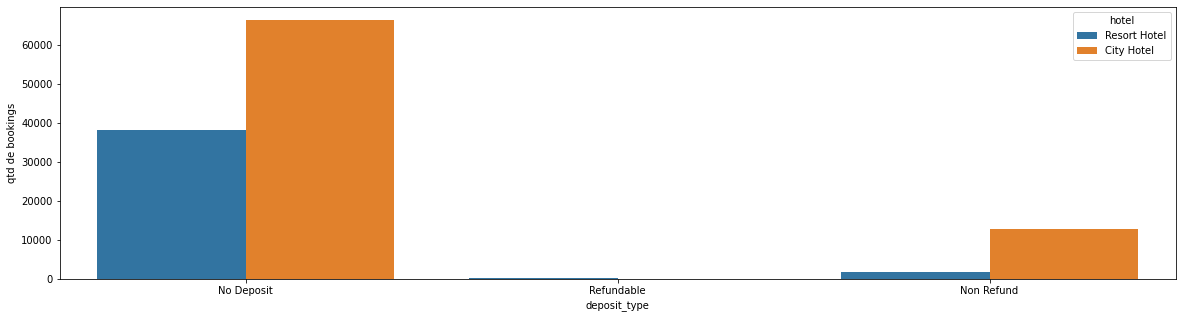

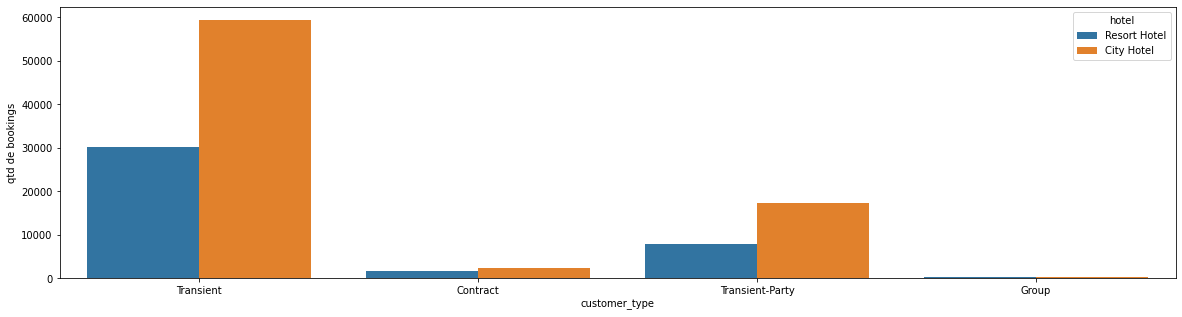

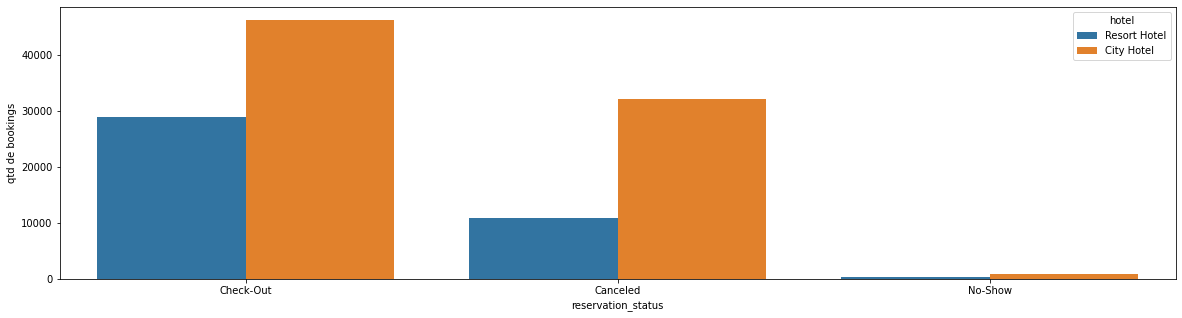

In [24]:
for feature in categoricas:
    plt.figure(figsize = (20,5))
    graph = sns.countplot(x = feature, data = df, hue="hotel")
    graph.set_xlabel(feature)
    graph.set_ylabel('qtd de bookings')

In [25]:
print(categoricas_especiais)
print(categoricas)

#for feature in categoricas:
#    plt.figure(figsize=(40,5))
#    graph = sns.catplot(x=feature , hue="reservation_status", col="hotel", data=df, kind="count")

['arrival_date_month', 'country', 'reservation_status_date']
['meal', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status']


### Testando as visualizações

In [26]:
print(numericas)

fig = px.line(data_frame = df.groupby("arrival_date")["arrival_date_week_number"].count(),
             title="Quantidade de Bookings por Data de Chegada", labels={"value":"quantidade de bookings","arrival_date":"data de chegada"})
fig.show()

['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']


In [27]:
#df.groupby("arrival_date").count()

In [28]:
# verificando datas individuais

dia = "2015-12-05"
dia = dt.datetime.strptime(dia, "%Y-%m-%d").date()
#df[df["arrival_date"] == dia]
#df["enter_date"][0]

### Criar coluna enter_date que contém a data do pedido do booking

In [29]:
df["lead_time"] = pd.to_timedelta(df["lead_time"], unit="D")
df["arrival_date"] = df.apply(lambda x: dt.datetime(x.arrival_date_year, x.arrival_date_month, x.arrival_date_day_of_month), axis=1)
df["enter_date"] = (df["arrival_date"]-df["lead_time"])

In [30]:
#df["lead_time"]
#df["arrival_date"]
#df.enter_date+df.lead_time
#df["lead_time"].value_counts()
df["lead_int"] = pd.to_numeric(df["lead_time"].dt.days)

In [31]:
fig = px.line(data_frame = df.groupby("enter_date")["lead_time"].count(),
             title="Quantidade de Bookings por Dia de Pedido", labels={"value":"quantidade de bookings","arrival_date":"data do pedido"})
fig.show()

In [35]:
# boxplot do seaborn

#plt.figure(figsize=(20,4))
#ax = sns.boxplot(data=df , x= "lead_int",  y="hotel", orient="h", palette="Set2")

# violinplot do plotly
#fig = px.violin(df, y="lead_int",color="hotel", box = True, points = "outliers")
#fig.show()

# boxplot do plotly 

fig = px.box(data_frame = df, x="lead_int", color= "hotel")
fig.show()